In [74]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
df = pd.read_csv('../data/data.csv')


In [76]:
df.head()


,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.78778596503064,33.74660933896648,47.59666666666671,19.2,44.790000,19.79,NaN,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.0,19.89,46.69333333333329,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.0,19.89,46.3,19.2,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.0,33.74660933896648,46.0666666666667,19.2,44.590000,19.79,45.000000,NaN,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.0,19.89,46.33333333333329,19.2,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097


In [77]:
df.columns

Index(['timestamp', 'equipment_energy_consumption', 'lighting_energy',
       'zone1_temperature', 'zone1_humidity', 'zone2_temperature',
       'zone2_humidity', 'zone3_temperature', 'zone3_humidity',
       'zone4_temperature', 'zone4_humidity', 'zone5_temperature',
       'zone5_humidity', 'zone6_temperature', 'zone6_humidity',
       'zone7_temperature', 'zone7_humidity', 'zone8_temperature',
       'zone8_humidity', 'zone9_temperature', 'zone9_humidity',
       'outdoor_temperature', 'atmospheric_pressure', 'outdoor_humidity',
       'wind_speed', 'visibility_index', 'dew_point', 'random_variable1',
       'random_variable2'],
      dtype='object')

In [78]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   timestamp                     16857 non-null  object 
 1   equipment_energy_consumption  16013 non-null  object 
 2   lighting_energy               16048 non-null  object 
 3   zone1_temperature             15990 non-null  object 
 4   zone1_humidity                16056 non-null  object 
 5   zone2_temperature             16004 non-null  object 
 6   zone2_humidity                15990 non-null  float64
 7   zone3_temperature             16055 non-null  float64
 8   zone3_humidity                15979 non-null  float64
 9   zone4_temperature             16041 non-null  float64
 10  zone4_humidity                16076 non-null  float64
 11  zone5_temperature             16019 non-null  float64
 12  zone5_humidity                16056 non-null  float64
 13  z

In [79]:
df.isnull().sum()

timestamp                         0
equipment_energy_consumption    844
lighting_energy                 809
zone1_temperature               867
zone1_humidity                  801
zone2_temperature               853
zone2_humidity                  867
zone3_temperature               802
zone3_humidity                  878
zone4_temperature               816
zone4_humidity                  781
zone5_temperature               838
zone5_humidity                  801
zone6_temperature               848
zone6_humidity                  847
zone7_temperature               794
zone7_humidity                  805
zone8_temperature               848
zone8_humidity                  777
zone9_temperature               773
zone9_humidity                  888
outdoor_temperature             806
atmospheric_pressure            842
outdoor_humidity                799
wind_speed                      828
visibility_index                815
dew_point                       826
random_variable1            

In [80]:
df.isnull().mean() * 100


timestamp                       0.000000
equipment_energy_consumption    5.006822
lighting_energy                 4.799193
zone1_temperature               5.143264
zone1_humidity                  4.751735
zone2_temperature               5.060212
zone2_humidity                  5.143264
zone3_temperature               4.757667
zone3_humidity                  5.208519
zone4_temperature               4.840719
zone4_humidity                  4.633090
zone5_temperature               4.971229
zone5_humidity                  4.751735
zone6_temperature               5.030551
zone6_humidity                  5.024619
zone7_temperature               4.710209
zone7_humidity                  4.775464
zone8_temperature               5.030551
zone8_humidity                  4.609361
zone9_temperature               4.585632
zone9_humidity                  5.267841
outdoor_temperature             4.781396
atmospheric_pressure            4.994958
outdoor_humidity                4.739871
wind_speed      

In [81]:
Temperature = df[['zone1_temperature','zone2_temperature','zone3_temperature','zone4_temperature','zone5_temperature','zone6_temperature','zone7_temperature','zone8_temperature','zone9_temperature']]
Humidity = df[['zone1_humidity','zone2_humidity','zone3_humidity','zone4_humidity','zone5_humidity','zone6_humidity','zone7_humidity','zone8_humidity','zone9_humidity']]


In [82]:
Temperature.describe()

,zone3_temperature,zone4_temperature,zone5_temperature,zone6_temperature,zone7_temperature,zone8_temperature,zone9_temperature
count,16055.000000,16041.000000,16019.000000,16009.000000,16063.000000,16009.000000,16084.000000
mean,21.665733,20.239922,19.052613,6.469934,19.672472,21.606344,18.851085
std,2.594309,2.783050,2.346158,8.867993,2.879815,2.974989,2.528783
min,6.543921,4.613485,5.921094,-42.987365,3.578021,4.502372,4.476511
25%,20.533333,19.266667,18.061111,2.930000,18.500000,20.500000,17.890000
50%,21.767500,20.290000,19.050000,6.263333,19.600000,21.790000,18.890000
75%,22.760000,21.356667,20.100000,9.690000,21.000000,22.790000,20.200000
max,36.823982,35.921144,32.157594,55.932271,35.712952,38.626835,33.238012


In [83]:
#Zone 1 Temperature and Zone 2 Temperature are of object type
df[df['zone1_temperature'] == 'unknown']


,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
80,2016-01-12 06:20:00,40.0,0.0,unknown,46.43,19.29,45.000000,20.290000,45.590000,19.426667,...,17.100000,49.966667,4.966667,740.566667,94.333333,4.333333,36.333333,4.100000,21.732974,21.732974
602,2016-01-15 20:50:00,130.0,20.0,unknown,40.463333333333296,22.29,39.590000,21.290000,42.090000,20.763333,...,17.245000,41.045000,2.250000,759.216667,NaN,NaN,64.000000,1.766667,22.524272,22.524272
1098,2016-01-19 07:10:00,20.0,10.0,unknown,39.933333333333294,17.39,40.560000,19.390000,39.863333,18.200000,...,16.790000,NaN,-4.300000,756.550000,89.833333,1.000000,64.000000,-5.733333,14.982031,14.982031
1697,2016-01-23 10:50:00,120.0,10.0,unknown,43.7,16.2,43.900000,17.500000,41.790000,15.190000,...,NaN,43.200000,6.250000,769.766667,99.833333,3.833333,34.000000,6.233333,28.966452,NaN
1893,2016-01-24 19:20:00,60.0,30.0,unknown,43.1633333333333,20.9266666666667,42.500000,20.760000,44.590000,17.500000,...,NaN,48.590000,7.933333,767.600000,95.666667,3.000000,63.000000,7.300000,29.648178,29.648178
4212,2016-02-09 21:00:00,140.0,10.0,unknown,45.1,22.4266666666667,41.066667,22.600000,NaN,19.290000,...,19.000000,41.860000,3.200000,737.500000,93.000000,6.000000,-82.329792,2.100000,4.497598,4.497598
4278,2016-02-10 08:10:00,60.0,0.0,unknown,42.1266666666667,20.29,40.966667,21.890000,40.826667,18.600000,...,4.476511,46.090000,3.033333,833.392675,94.000000,6.000000,40.000000,2.133333,1.817278,1.817278
5350,2016-02-17 18:00:00,90.0,0.0,unknown,33.7,19.1,34.060000,20.100000,35.137143,19.100000,...,18.000000,38.933333,1.600000,756.400000,84.000000,2.000000,64.000000,-0.800000,NaN,22.728871
8130,2016-03-07 22:30:00,70.0,20.0,unknown,36.9666666666667,18.89,38.400000,21.260000,36.590000,21.300000,...,17.500000,35.466667,0.700000,NaN,95.000000,1.500000,21.000000,0.000000,21.577556,21.577556
9242,2016-03-15 15:10:00,70.0,10.0,unknown,33.43,20.23,33.266667,20.700000,34.000000,21.100000,...,19.730000,37.590000,49.853906,NaN,58.166667,5.166667,159.606156,2.500000,48.388559,48.388559


In [84]:
df['zone1_temperature'] = pd.to_numeric(df['zone1_temperature'], errors='coerce')
df['zone2_temperature'] = pd.to_numeric(df['zone2_temperature'], errors='coerce')



In [85]:
df['zone1_temperature']= df['zone1_temperature'].astype(float)
df['zone2_temperature']= df['zone2_temperature'].astype(float)

In [86]:
Temperature = df[['zone1_temperature','zone2_temperature','zone3_temperature','zone4_temperature','zone5_temperature','zone6_temperature','zone7_temperature','zone8_temperature','zone9_temperature']]
Temperature.describe()


,zone1_temperature,zone2_temperature,zone3_temperature,zone4_temperature,zone5_temperature,zone6_temperature,zone7_temperature,zone8_temperature,zone9_temperature
count,15908.000000,15934.000000,16055.000000,16041.000000,16019.000000,16009.000000,16063.000000,16009.000000,16084.000000
mean,21.249414,19.793113,21.665733,20.239922,19.052613,6.469934,19.672472,21.606344,18.851085
std,2.165618,2.943771,2.594309,2.783050,2.346158,8.867993,2.879815,2.974989,2.528783
min,8.726818,2.988199,6.543921,4.613485,5.921094,-42.987365,3.578021,4.502372,4.476511
25%,20.500000,18.600000,20.533333,19.266667,18.061111,2.930000,18.500000,20.500000,17.890000
50%,21.323333,19.600000,21.767500,20.290000,19.050000,6.263333,19.600000,21.790000,18.890000
75%,22.100000,20.790000,22.760000,21.356667,20.100000,9.690000,21.000000,22.790000,20.200000
max,33.746609,36.552882,36.823982,35.921144,32.157594,55.932271,35.712952,38.626835,33.238012


In [87]:
df['equipment_energy_consumption'] = pd.to_numeric(df['equipment_energy_consumption'], errors='coerce')


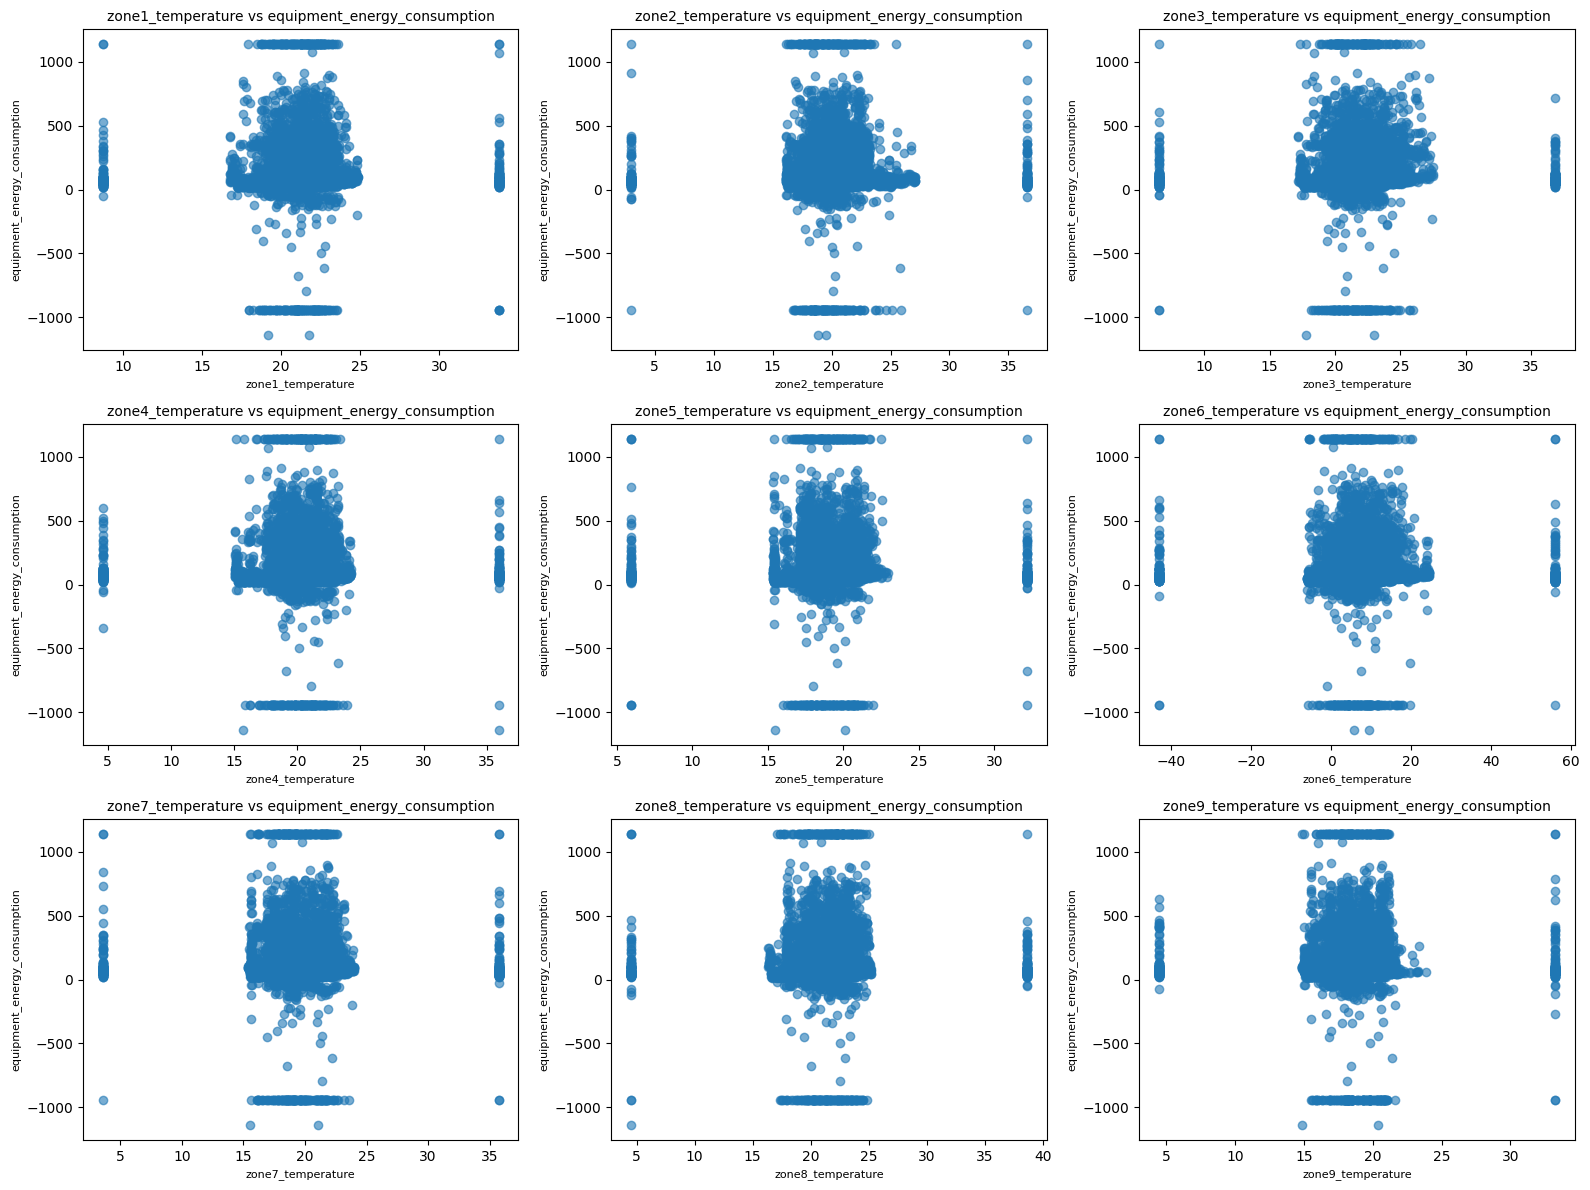

In [88]:
plt.figure(figsize=(16, 12))
for i, feature in enumerate(Temperature):
    plt.subplot(3, 3, i + 1)  # 3 rows, 3 columns, plot number i+1
    plt.scatter(df[feature], df['equipment_energy_consumption'], alpha=0.6)
    plt.title(f'{feature} vs equipment_energy_consumption', fontsize=10)
    plt.xlabel(feature, fontsize=8)
    plt.ylabel('equipment_energy_consumption', fontsize=8)
    plt.tight_layout()

plt.show()

In [90]:
Humidity.describe()


,zone2_humidity,zone3_humidity,zone4_humidity,zone5_humidity,zone6_humidity,zone7_humidity,zone8_humidity,zone9_humidity
count,15990.000000,15979.000000,16076.000000,16056.000000,16010.000000,16052.000000,16080.000000,15969.000000
mean,39.494553,38.201314,37.945608,50.289131,59.162913,34.032621,41.853532,40.318199
std,10.129513,10.144388,10.769813,18.722516,52.657787,11.345440,12.301530,11.168678
min,-77.265503,-71.406273,-81.446225,-141.640143,-353.393026,-84.882898,-94.385668,-81.582494
25%,37.757500,36.592500,35.200000,45.290000,37.066667,31.000000,38.626667,38.230000
50%,40.293333,38.400000,38.090000,48.854429,62.766667,34.230000,42.040455,40.363333
75%,43.000000,41.433333,41.560833,53.918333,86.590000,38.156667,46.003889,43.790000
max,77.265503,71.406273,81.446225,141.640143,353.393026,84.882898,94.385668,81.582494


In [91]:
df['zone1_humidity'] = pd.to_numeric(df['zone1_humidity'], errors='coerce')


In [92]:
Humidity = df[['zone1_humidity','zone2_humidity','zone3_humidity','zone4_humidity','zone5_humidity','zone6_humidity','zone7_humidity','zone8_humidity','zone9_humidity']]

Humidity.describe() 


,zone1_humidity,zone2_humidity,zone3_humidity,zone4_humidity,zone5_humidity,zone6_humidity,zone7_humidity,zone8_humidity,zone9_humidity
count,15969.000000,15990.000000,15979.000000,16076.000000,16056.000000,16010.000000,16052.000000,16080.000000,15969.000000
mean,39.046066,39.494553,38.201314,37.945608,50.289131,59.162913,34.032621,41.853532,40.318199
std,9.952521,10.129513,10.144388,10.769813,18.722516,52.657787,11.345440,12.301530,11.168678
min,-46.660000,-77.265503,-71.406273,-81.446225,-141.640143,-353.393026,-84.882898,-94.385668,-81.582494
25%,37.026667,37.757500,36.592500,35.200000,45.290000,37.066667,31.000000,38.626667,38.230000
50%,39.226667,40.293333,38.400000,38.090000,48.854429,62.766667,34.230000,42.040455,40.363333
75%,42.500000,43.000000,41.433333,41.560833,53.918333,86.590000,38.156667,46.003889,43.790000
max,76.292756,77.265503,71.406273,81.446225,141.640143,353.393026,84.882898,94.385668,81.582494


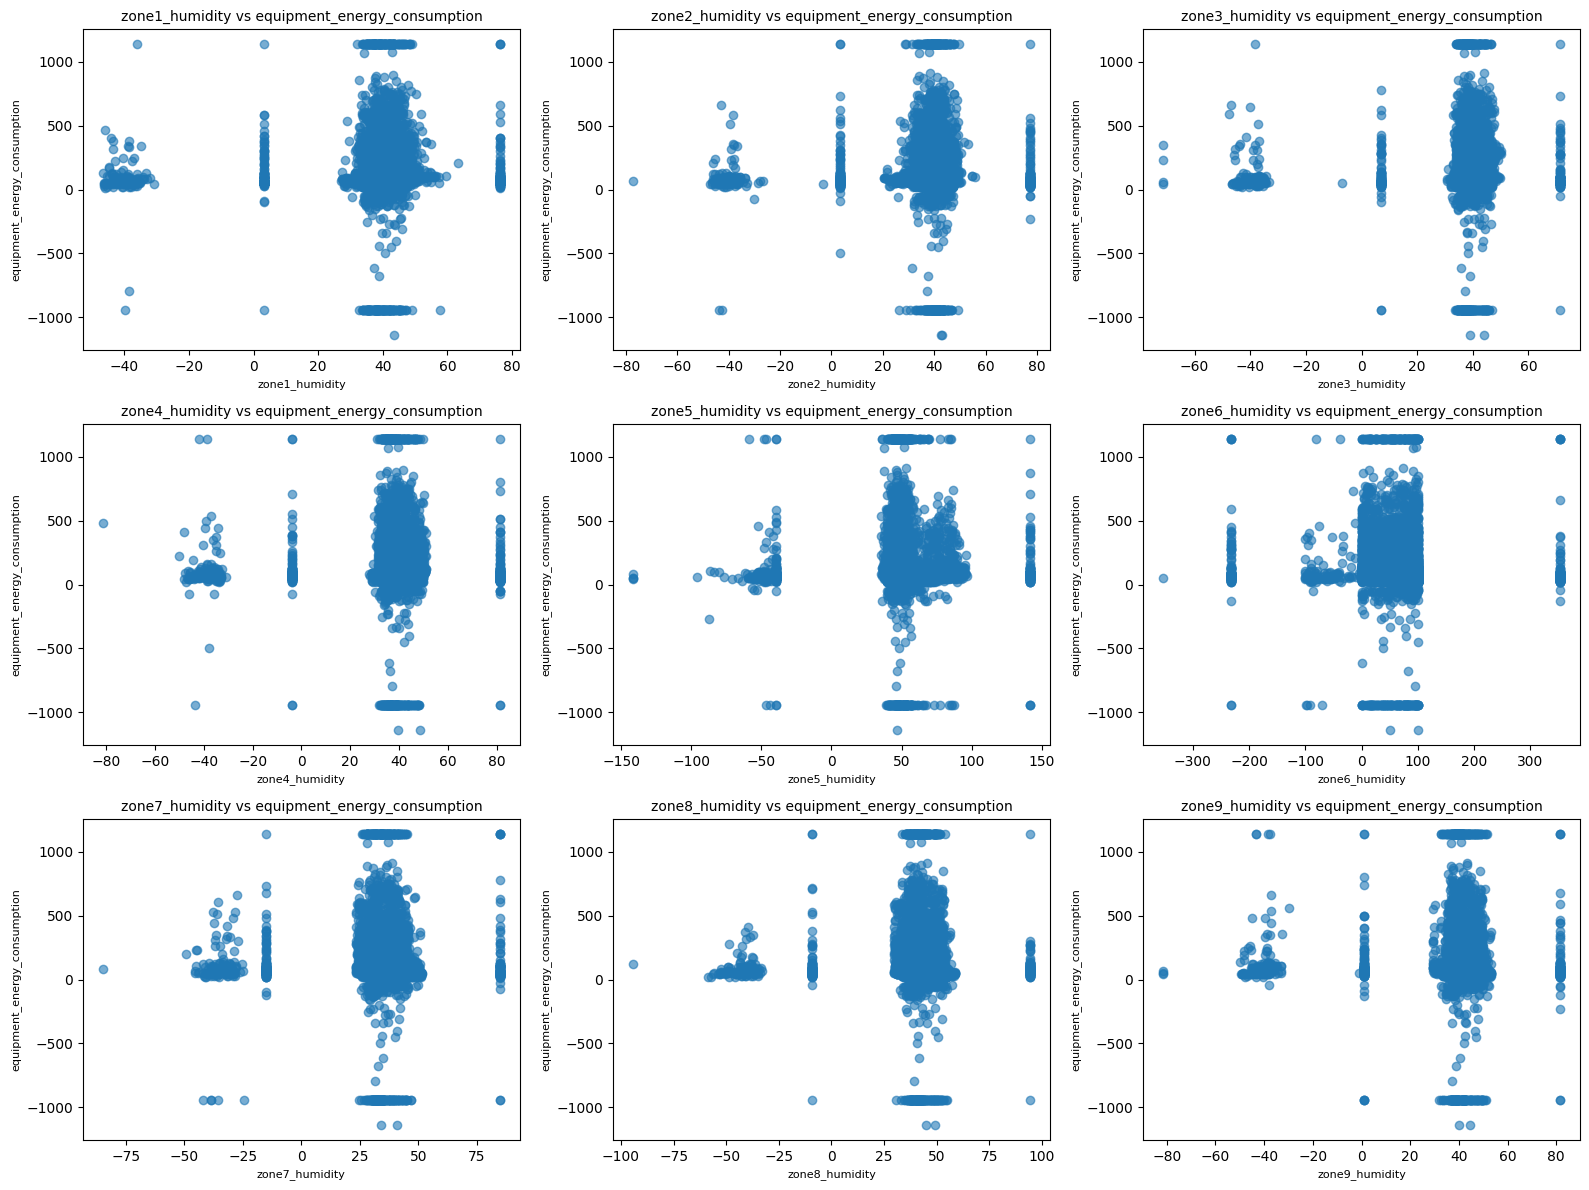

In [93]:
plt.figure(figsize=(16, 12))
for i, feature in enumerate(Humidity):
    plt.subplot(3, 3, i + 1)  # 3 rows, 3 columns, plot number i+1
    plt.scatter(df[feature], df['equipment_energy_consumption'], alpha=0.6)
    plt.title(f'{feature} vs equipment_energy_consumption', fontsize=10)
    plt.xlabel(feature, fontsize=8)
    plt.ylabel('equipment_energy_consumption', fontsize=8)
    plt.tight_layout()

plt.show()

In [95]:
#Filling Nan values
df['zone1_humidity'] = df['zone1_humidity'].fillna(df['zone1_humidity'].median())
df['zone2_humidity'] = df['zone2_humidity'].fillna(df['zone2_humidity'].median())
df['zone3_humidity'] = df['zone3_humidity'].fillna(df['zone3_humidity'].median())
df['zone4_humidity'] = df['zone4_humidity'].fillna(df['zone4_humidity'].median())
df['zone5_humidity'] = df['zone5_humidity'].fillna(df['zone5_humidity'].median())
df['zone6_humidity'] = df['zone6_humidity'].fillna(df['zone6_humidity'].median())
df['zone7_humidity'] = df['zone7_humidity'].fillna(df['zone7_humidity'].median())
df['zone8_humidity'] = df['zone8_humidity'].fillna(df['zone8_humidity'].median())
df['zone9_humidity'] = df['zone9_humidity'].fillna(df['zone9_humidity'].median())

df['zone1_temperature'] = df['zone1_temperature'].fillna(df['zone1_temperature'].median())
df['zone2_temperature'] = df['zone2_temperature'].fillna(df['zone2_temperature'].median())
df['zone3_temperature'] = df['zone3_temperature'].fillna(df['zone3_temperature'].median())
df['zone4_temperature'] = df['zone4_temperature'].fillna(df['zone4_temperature'].median())
df['zone5_temperature'] = df['zone5_temperature'].fillna(df['zone5_temperature'].median())
df['zone6_temperature'] = df['zone6_temperature'].fillna(df['zone6_temperature'].median())
df['zone7_temperature'] = df['zone7_temperature'].fillna(df['zone7_temperature'].median())
df['zone8_temperature'] = df['zone8_temperature'].fillna(df['zone8_temperature'].median())
df['zone9_temperature'] = df['zone9_temperature'].fillna(df['zone9_temperature'].median())

In [96]:
#creating new features Zone wise
df['zone1_heat'] = df['zone1_temperature'] * df['zone1_humidity']
df['zone2_heat'] = df['zone2_temperature'] * df['zone2_humidity']
df['zone3_heat'] = df['zone3_temperature'] * df['zone3_humidity']
df['zone4_heat'] = df['zone4_temperature'] * df['zone4_humidity']
df['zone5_heat'] = df['zone5_temperature'] * df['zone5_humidity']
df['zone6_heat'] = df['zone6_temperature'] * df['zone6_humidity']
df['zone7_heat'] = df['zone7_temperature'] * df['zone7_humidity']
df['zone8_heat'] = df['zone8_temperature'] * df['zone8_humidity']
df['zone9_heat'] = df['zone9_temperature'] * df['zone9_humidity']

In [97]:
df.drop(columns=['zone1_temperature','zone2_temperature','zone3_temperature','zone4_temperature','zone5_temperature','zone6_temperature','zone7_temperature','zone8_temperature','zone9_temperature','zone1_humidity','zone2_humidity','zone3_humidity','zone4_humidity','zone5_humidity','zone6_humidity','zone7_humidity','zone8_humidity','zone9_humidity'],inplace=True)

In [98]:
df.head()

,timestamp,equipment_energy_consumption,lighting_energy,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2,zone1_heat,zone2_heat,zone3_heat,zone4_heat,zone5_heat,zone6_heat,zone7_heat,zone8_heat,zone9_heat
0,2016-01-11 17:00:00,60.0,-77.78778596503064,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433,1606.226116,859.968,759.936000,865.766667,947.600000,527.727589,715.978667,889.980000,775.527667
1,2016-01-11 17:10:00,60.0,30.0,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195,928.730400,858.672,886.394100,873.857500,947.600000,574.432778,588.756000,889.312667,777.557333
2,2016-01-11 17:20:00,50.0,30.0,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668,920.907000,856.832,889.230667,1648.421284,1049.464500,545.507733,712.653333,886.886000,773.500000
3,2016-01-11 17:30:00,50.0,40.0,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389,1554.593804,856.128,890.550000,927.726433,945.711667,536.690111,707.435333,1708.380589,771.800000
4,2016-01-11 17:40:00,60.0,40.0,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097,921.570000,854.976,890.550000,860.061700,947.548000,540.487556,709.156000,879.479000,203.233596


In [99]:
Heat = df[['zone1_heat','zone2_heat','zone3_heat','zone4_heat','zone5_heat','zone6_heat','zone7_heat','zone8_heat','zone9_heat']]
Heat.describe()  # 3 rows, 3 columns, plot number i+1



,zone1_heat,zone2_heat,zone3_heat,zone4_heat,zone5_heat,zone6_heat,zone7_heat,zone8_heat,zone9_heat
count,16857.000000,16857.000000,16857.000000,16857.000000,16857.000000,16857.000000,16857.000000,16857.000000,16857.000000
mean,829.887914,780.626346,827.046499,766.567845,957.727670,311.440697,667.532176,901.651078,758.392319
std,222.162424,221.420439,233.029656,233.813207,373.014852,718.719055,232.407797,278.228798,224.361657
min,-1082.512000,-1447.128613,-1678.047412,-1628.924492,-2817.222441,-15191.434843,-1889.493319,-2056.663704,-1590.858641
25%,774.316733,724.532400,780.740000,706.063333,854.143000,114.245100,600.476562,839.446667,714.780033
50%,837.966667,791.250000,840.576000,775.636067,931.674000,281.843333,681.956918,904.728231,768.180000
75%,904.340000,857.845067,902.629467,845.247433,1021.228000,468.416000,756.296000,991.914000,834.630667
max,1884.431073,2824.276833,1894.408419,2925.641537,4554.806266,19766.074425,3031.418845,3645.819593,1854.642040


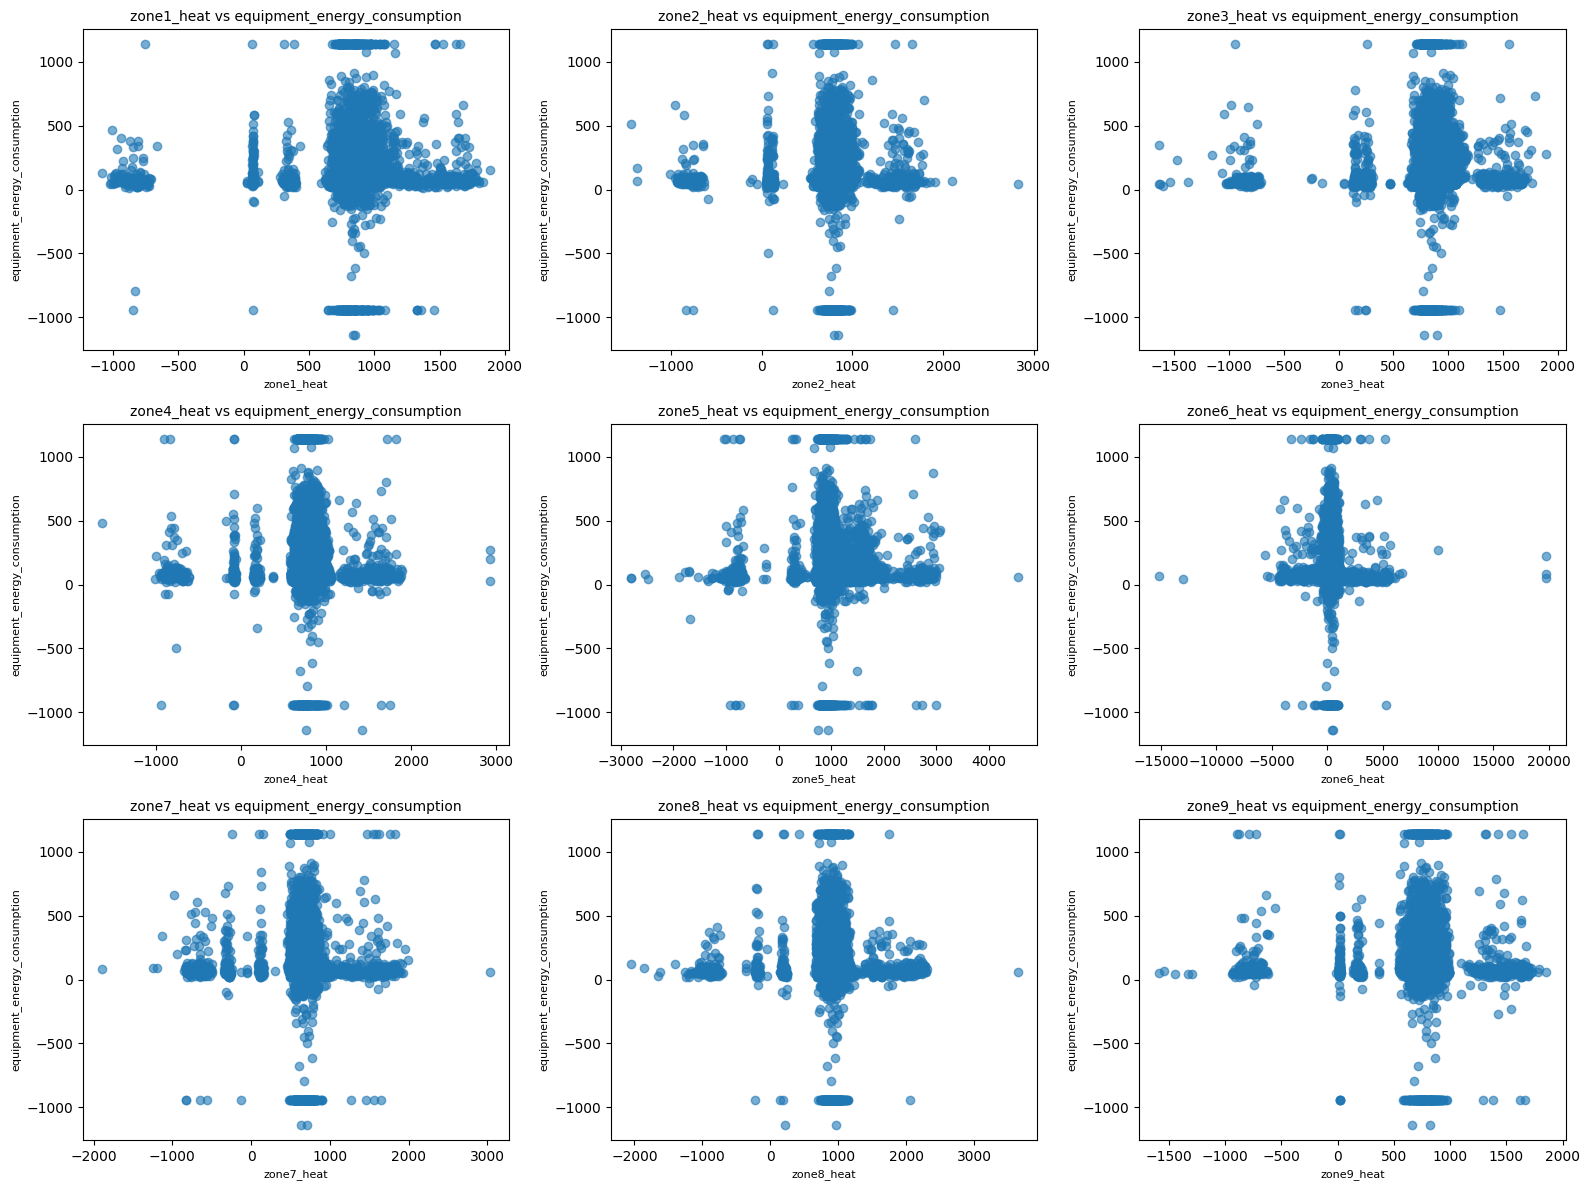

In [100]:
plt.figure(figsize=(16, 12))
for i, feature in enumerate(Heat):
    plt.subplot(3, 3, i + 1)  # 3 rows, 3 columns, plot number i+1
    plt.scatter(df[feature], df['equipment_energy_consumption'], alpha=0.6)
    plt.title(f'{feature} vs equipment_energy_consumption', fontsize=10)
    plt.xlabel(feature, fontsize=8)
    plt.ylabel('equipment_energy_consumption', fontsize=8)
    plt.tight_layout()

plt.show()

In [101]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [103]:
df.dtypes

timestamp                       datetime64[ns]
equipment_energy_consumption           float64
lighting_energy                         object
outdoor_temperature                    float64
atmospheric_pressure                   float64
outdoor_humidity                       float64
wind_speed                             float64
visibility_index                       float64
dew_point                              float64
random_variable1                       float64
random_variable2                       float64
zone1_heat                             float64
zone2_heat                             float64
zone3_heat                             float64
zone4_heat                             float64
zone5_heat                             float64
zone6_heat                             float64
zone7_heat                             float64
zone8_heat                             float64
zone9_heat                             float64
dtype: object

In [105]:
df['lighting_energy'] = pd.to_numeric(df['lighting_energy'], errors='coerce')


In [121]:
df['lighting_energy'].fillna(df['lighting_energy'].median(), inplace=True)
df['outdoor_temperature'].fillna(df['outdoor_temperature'].median(), inplace=True)
df['atmospheric_pressure'].fillna(df['atmospheric_pressure'].median(), inplace=True)
df['wind_speed'].fillna(df['wind_speed'].median(), inplace=True)
df['outdoor_humidity'].fillna(df['outdoor_humidity'].median(), inplace=True)
df['visibility_index'].fillna(df['visibility_index'].median(), inplace=True)
df['dew_point'].fillna(df['dew_point'].median(), inplace=True)
df['random_variable1'].fillna(df['random_variable1'].median(), inplace=True)
df['random_variable2'].fillna(df['random_variable2'].median(), inplace=True)
df['equipment_energy_consumption'].fillna(df['equipment_energy_consumption'].median(), inplace=True)


C:\Users\Reyan\AppData\Local\Temp\ipykernel_1668\3160116192.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['lighting_energy'].fillna(df['lighting_energy'].median(), inplace=True)
C:\Users\Reyan\AppData\Local\Temp\ipykernel_1668\3160116192.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

C:\Users\Reyan\AppData\Local\Temp\ipykernel_1668\4031527603.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M', on='timestamp')['equipment_energy_consumption'].median().plot(kind='bar', figsize=(16, 20))


<Axes: xlabel='timestamp'>

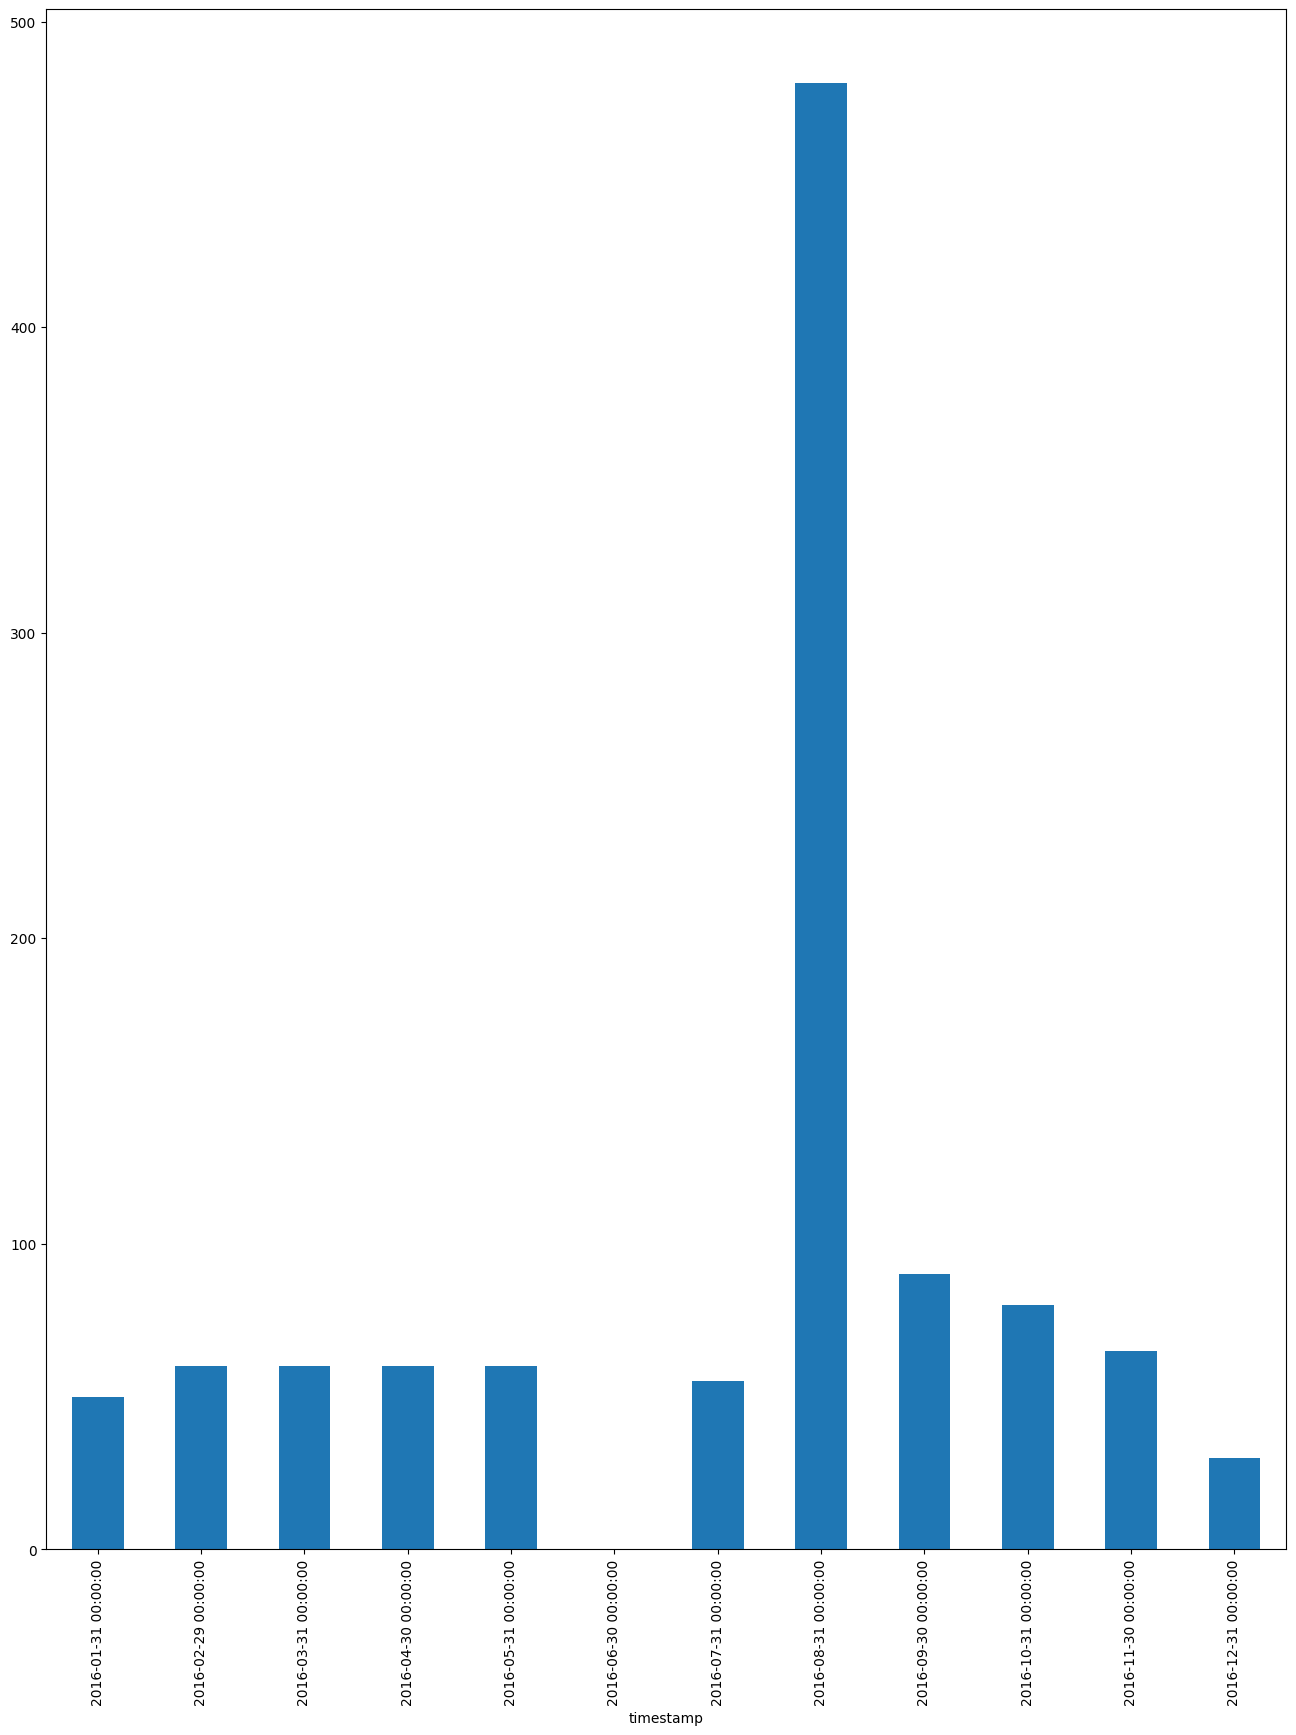

In [127]:
df.resample('M', on='timestamp')['equipment_energy_consumption'].median().plot(kind='bar', figsize=(16, 20))


In [116]:
#Maximum energy consumption is in the month of September
#data missing in the month of June


In [129]:
df.columns

Index(['timestamp', 'equipment_energy_consumption', 'lighting_energy',
       'outdoor_temperature', 'atmospheric_pressure', 'outdoor_humidity',
       'wind_speed', 'visibility_index', 'dew_point', 'random_variable1',
       'random_variable2', 'zone1_heat', 'zone2_heat', 'zone3_heat',
       'zone4_heat', 'zone5_heat', 'zone6_heat', 'zone7_heat', 'zone8_heat',
       'zone9_heat'],
      dtype='object')

In [130]:
from statsmodels.tsa.stattools import adfuller


In [133]:
def adf_test(series, column_name):
    try:
        result = adfuller(series.dropna())
        print(f'--- ADF Test for {column_name} ---')
        print(f'ADF Statistic: {result[0]}')
        print(f'p-value: {result[1]}')
        for key, value in result[4].items():
            print(f'Critical Value ({key}): {value}')
        if result[1] <= 0.05:
            print("✅ Stationary (reject H0)\n")
        else:
            print("❌ Non-stationary (fail to reject H0)\n")
    except Exception as e:
        print(f"Could not process {column_name}: {e}\n")

# Apply ADF test to all numeric columns
for col in df.columns:
    adf_test(df[col], col)


--- ADF Test for timestamp ---
ADF Statistic: 0.5760011925456471
p-value: 0.9870089174429982
Critical Value (1%): -3.4307382403370665
Critical Value (5%): -2.86171158681448
Critical Value (10%): -2.5668613312801742
❌ Non-stationary (fail to reject H0)

--- ADF Test for equipment_energy_consumption ---
ADF Statistic: -21.504546776867954
p-value: 0.0
Critical Value (1%): -3.4307384709735333
Critical Value (5%): -2.8617116887399723
Critical Value (10%): -2.5668613855336693
✅ Stationary (reject H0)

--- ADF Test for lighting_energy ---
ADF Statistic: -21.419024046785395
p-value: 0.0
Critical Value (1%): -3.430738401753826
Critical Value (5%): -2.8617116581496123
Critical Value (10%): -2.566861369250854
✅ Stationary (reject H0)

--- ADF Test for outdoor_temperature ---
ADF Statistic: -9.907498211040707
p-value: 3.234210860951876e-17
Critical Value (1%): -3.430738632582171
Critical Value (5%): -2.8617117601598965
Critical Value (10%): -2.5668614235494833
✅ Stationary (reject H0)

--- ADF Tes

In [ ]:
#CLearly the data is stationary

In [139]:
df.set_index('timestamp', inplace=True)  

In [141]:
df.index.hour

Index([17, 17, 17, 17, 17, 17, 18, 18, 18, 18,
       ...
       16, 18, 21,  3, 12, 20,  6,  0, 13, 15],
      dtype='int32', name='timestamp', length=16857)

In [142]:
def add_time_features(df):
    df['hour'] = df.index.hour
    df['day'] = df.index.day
    df['weekday'] = df.index.weekday  # 0 = Monday
    df['month'] = df.index.month
    return df


In [145]:
df = add_time_features(df)


In [146]:
df.head()

,equipment_energy_consumption,lighting_energy,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2,...,zone5_heat,zone6_heat,zone7_heat,zone8_heat,zone9_heat,hour,day,weekday,month,year
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60.0,-77.787786,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433,...,947.600000,527.727589,715.978667,889.980000,775.527667,17,11,0,1,2016
2016-01-11 17:10:00,60.0,30.000000,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195,...,947.600000,574.432778,588.756000,889.312667,777.557333,17,11,0,1,2016
2016-01-11 17:20:00,50.0,30.000000,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668,...,1049.464500,545.507733,712.653333,886.886000,773.500000,17,11,0,1,2016
2016-01-11 17:30:00,50.0,40.000000,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389,...,945.711667,536.690111,707.435333,1708.380589,771.800000,17,11,0,1,2016
2016-01-11 17:40:00,60.0,40.000000,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097,...,947.548000,540.487556,709.156000,879.479000,203.233596,17,11,0,1,2016


<Axes: xlabel='month', ylabel='equipment_energy_consumption'>

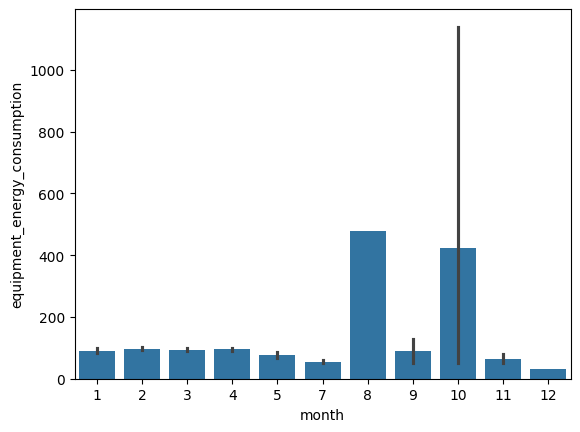

In [147]:
sns.barplot(x='month', y='equipment_energy_consumption', data=df)


<Axes: xlabel='hour', ylabel='equipment_energy_consumption'>

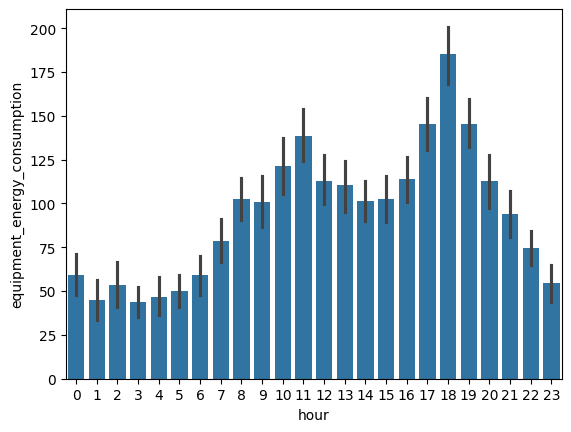

In [148]:
sns.barplot(x='hour', y='equipment_energy_consumption', data=df)


<Axes: xlabel='weekday', ylabel='equipment_energy_consumption'>

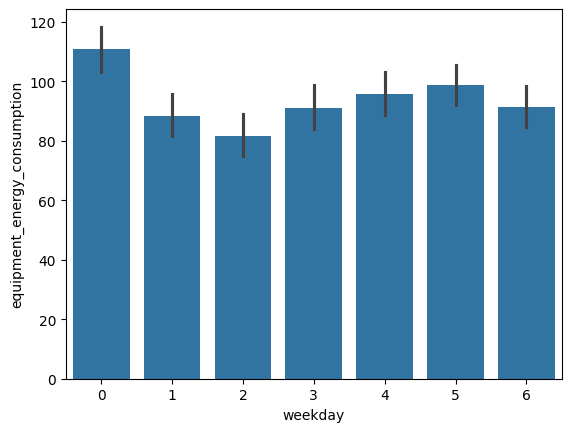

In [149]:
sns.barplot(x='weekday', y='equipment_energy_consumption', data=df)




<Axes: xlabel='day', ylabel='equipment_energy_consumption'>

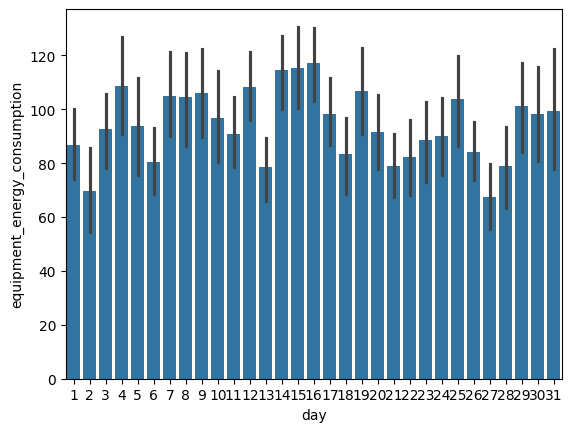

In [150]:
sns.barplot(x='day', y='equipment_energy_consumption', data=df)


In [151]:
def adf_test(series, column_name):
    try:
        result = adfuller(series.dropna())
        print(f'--- ADF Test for {column_name} ---')
        print(f'ADF Statistic: {result[0]}')
        print(f'p-value: {result[1]}')
        for key, value in result[4].items():
            print(f'Critical Value ({key}): {value}')
        if result[1] <= 0.05:
            print("✅ Stationary (reject H0)\n")
        else:
            print("❌ Non-stationary (fail to reject H0)\n")
    except Exception as e:
        print(f"Could not process {column_name}: {e}\n")

# Apply ADF test to all numeric columns
for col in df.columns:
    adf_test(df[col], col)

--- ADF Test for equipment_energy_consumption ---
ADF Statistic: -21.504546776867954
p-value: 0.0
Critical Value (1%): -3.4307384709735333
Critical Value (5%): -2.8617116887399723
Critical Value (10%): -2.5668613855336693
✅ Stationary (reject H0)

--- ADF Test for lighting_energy ---
ADF Statistic: -21.419024046785395
p-value: 0.0
Critical Value (1%): -3.430738401753826
Critical Value (5%): -2.8617116581496123
Critical Value (10%): -2.566861369250854
✅ Stationary (reject H0)

--- ADF Test for outdoor_temperature ---
ADF Statistic: -9.907498211040707
p-value: 3.234210860951876e-17
Critical Value (1%): -3.430738632582171
Critical Value (5%): -2.8617117601598965
Critical Value (10%): -2.5668614235494833
✅ Stationary (reject H0)

--- ADF Test for atmospheric_pressure ---
ADF Statistic: -5.365714801726383
p-value: 3.9965359688409095e-06
Critical Value (1%): -3.430739025620659
Critical Value (5%): -2.861711933855912
Critical Value (10%): -2.566861516005415
✅ Stationary (reject H0)

--- ADF T

In [152]:
#month data is non stationary

In [173]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [158]:
y=df['equipment_energy_consumption']
x = df.drop(['equipment_energy_consumption'],axis=1)

In [162]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [175]:
param_grid = {
    'n_estimators': [100, 200, 300,400,500,600,700,800,900,1000],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

In [177]:
xgb = xgb.XGBRegressor(random_state=42)

In [178]:
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='neg_mean_squared_error', 
    cv=5,
    verbose=2,
    n_jobs=-1 
)

grid_search.fit(x_train, y_train)


Fitting 5 folds for each of 360 candidates, totalling 1800 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300, 400, 500, 600, 700,
                                          800, 900, 1000],
                         'subsample': [0.8, 1]},
             scoring='neg_mean_squared_error', verbose=2)

<Axes: xlabel='Feature'>

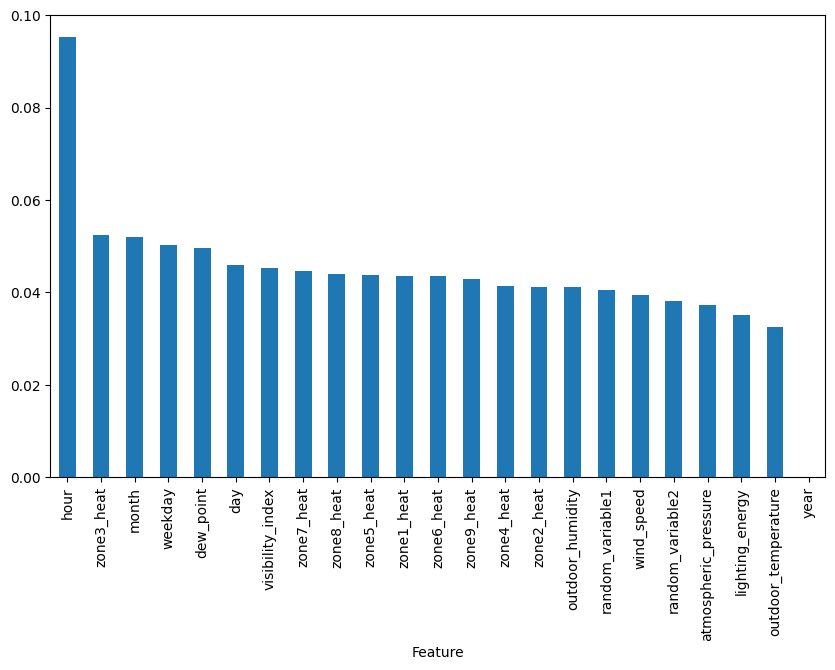

In [183]:
best_model = grid_search.best_estimator_

importances = best_model.feature_importances_

feature_names = x_train.columns  
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting the feature importance
importance_df.plot(kind='bar', x='Feature', y='Importance', figsize=(10, 6), legend=False)






In [185]:
grid_search.predict(x_test)


array([179.4666  ,  66.41334 , 137.07141 , ...,  66.347946, 105.17942 ,
        31.774162], shape=(3372,), dtype=float32)

In [187]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = grid_search.predict(x_test)

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")

mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.4f}")

rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")


R² Score: 0.0654
MSE: 30159.2103
RMSE: 173.6641


In [188]:
#the model fails to perform well on the test set


In [195]:
df.columns

Index(['equipment_energy_consumption', 'lighting_energy',
       'outdoor_temperature', 'atmospheric_pressure', 'outdoor_humidity',
       'wind_speed', 'visibility_index', 'dew_point', 'random_variable1',
       'random_variable2', 'zone1_heat', 'zone2_heat', 'zone3_heat',
       'zone4_heat', 'zone5_heat', 'zone6_heat', 'zone7_heat', 'zone8_heat',
       'zone9_heat', 'hour', 'day', 'weekday', 'month', 'year',
       'Month first difference'],
      dtype='object')

In [196]:
df.drop(['Month first difference'],axis=1,inplace=True)


In [197]:
df.head()

,equipment_energy_consumption,lighting_energy,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2,...,zone5_heat,zone6_heat,zone7_heat,zone8_heat,zone9_heat,hour,day,weekday,month,year
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60.0,-77.787786,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433,...,947.600000,527.727589,715.978667,889.980000,775.527667,17,11,0,1,2016
2016-01-11 17:10:00,60.0,30.000000,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195,...,947.600000,574.432778,588.756000,889.312667,777.557333,17,11,0,1,2016
2016-01-11 17:20:00,50.0,30.000000,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668,...,1049.464500,545.507733,712.653333,886.886000,773.500000,17,11,0,1,2016
2016-01-11 17:30:00,50.0,40.000000,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389,...,945.711667,536.690111,707.435333,1708.380589,771.800000,17,11,0,1,2016
2016-01-11 17:40:00,60.0,40.000000,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097,...,947.548000,540.487556,709.156000,879.479000,203.233596,17,11,0,1,2016


In [199]:
from sklearn.linear_model import LinearRegression


In [200]:
model = LinearRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)


In [202]:
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.4f}")

rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")







MSE: 31662.0058
RMSE: 177.9382
R² Score: 0.0188


In [228]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

target_column = 'equipment_energy_consumption'
target_index = df.columns.get_loc(target_column)

# Convert to supervised format: X(t) -> y(t+1)
def create_dataset(data, target_index, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(np.delete(data[i:i+n_steps], target_index, axis=1))  # Independent features (exclude target)
        y.append(data[i+n_steps, target_index])  # Dependent feature (target)
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data, target_index, n_steps=10)

# Train/test split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [230]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(LSTM(64, input_shape=(X.shape[1], X.shape[2]), return_sequences=False,kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(1)) 
model.compile(optimizer='adam', loss='mse')

model.summary()
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test),callbacks=[early_stop],verbose=1)

y_pred = model.predict(X_test)



Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_13 (LSTM)                  │ (None, 64)             │        22,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,593 (88.25 KB)

 Trainable params: 22,593 (88.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2052 - val_loss: 0.0175
Epoch 2/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0160 - val_loss: 0.0069
Epoch 3/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0092 - val_loss: 0.0059
Epoch 4/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0077 - val_loss: 0.0054
Epoch 5/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0073 - val_loss: 0.0056
Epoch 6/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0073 - val_loss: 0.0056
Epoch 7/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0069 - val_loss: 0.0052
Epoch 8/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0073 - val_loss: 0.0052
Epoch 9/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0069 - val_loss: 0.0052
Epoch 10/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0068 - val_loss: 0.0055
Epoch 11/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0065 - val_loss: 0.0053
Epoch 12/100
422/422 ━━━━━━━━━━━━━━━━━━━━

In [231]:
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.4f}")

rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")


MSE: 0.0051
RMSE: 0.0717
R² Score: -0.0001


In [232]:
y_pred

array([[0.54024583],
       [0.54023725],
       [0.5402317 ],
       ...,
       [0.5402486 ],
       [0.5402422 ],
       [0.5402433 ]], shape=(3370, 1), dtype=float32)